# Customer Segmentation using various Clustering Algorithms

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Customers.csv')

In [3]:
print('There are {} rows and {} columns in our dataset'.format(data.shape[0],data.shape[1]))

There are 200 rows and 5 columns in our dataset


In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(45, 23, 'TOTAL Count: 112')

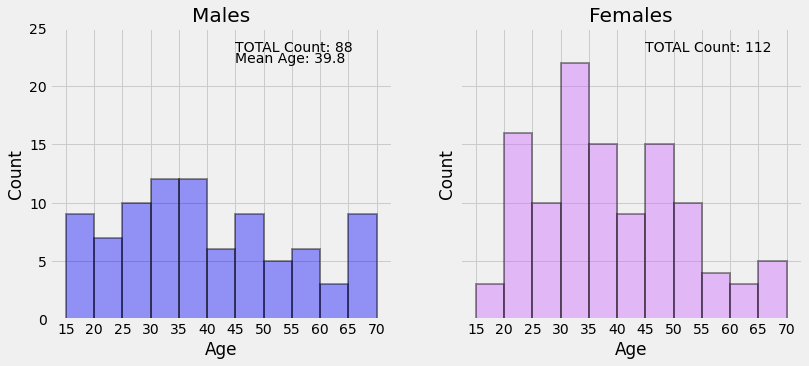

In [12]:
import matplotlib.style as style
style.use('fivethirtyeight')

males_age=data[data['Gender']=='Male']['Age']

females_age=data[data['Gender']=='Female']['Age']

age_bins = range(15,75,5)

fig2, (ax1, ax2)=plt.subplots(1,2, figsize=(12,5), sharey =True)

sns.distplot(males_age, bins=age_bins, kde=False, color='#0000ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))

ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL Count: {}".format(males_age.count()))
ax1.text(45,22, "Mean Age: {:.1f}".format(males_age.mean()))


sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL Count: {}".format(females_age.count()))





In [13]:
print('kolmogorov-Smirmov test p-val: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

kolmogorov-Smirmov test p-val: 0.49


The average age of male customers is slightly highier than that of female ones 39.8 versus 38.1. Distribution of male age is more uniform than females, where we can observe the biggest age group  is 30-35 years old. Kolmogorov Smirnov  test shows that the difference between this groups are statistically insignificant

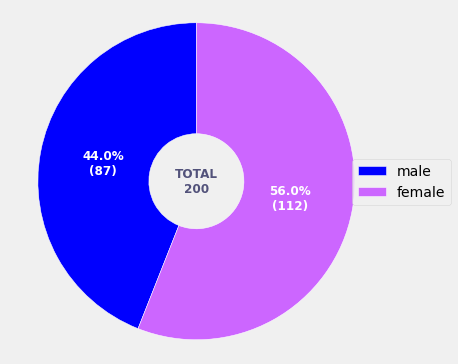

In [22]:
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()]

fig0, ax1 =plt.subplots(figsize=(6,6))

wedges, texts, autotexts = ax1.pie(sizes,
                                  autopct=lambda pct: labeler(pct, sizes),
                                  radius=1,
                                  colors=['#0000ff', '#cc66ff'],
                                  startangle=90,
                                  textprops=dict(color="w"),
                                  wedgeprops=dict(width=0.7, edgecolor='w'))
ax1.legend(wedges, ['male', 'female'],
          loc='center right',
          bbox_to_anchor=(0.7,0,0.5,1))
plt.text(0,0, 'TOTAL\n{}'.format(data['Age'].count()),
         weight='bold', size=12,color='#52527a',
         ha='center', va='center')
plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')
plt.show()

There are slightly more female customers than male ones (112 vs 87). FEMALE are 56% of total customers

In [33]:
males_income= data[data['Gender']=='Male']['Annual Income (k$)'] # subset with male incomes
females_income= data[data['Gender']=='Female']['Annual Income (k$)'] # subset with female incomes

my_bins = range(10, 150, 10)

# male hist
fig, (ax1, ax2, ax3)=plt.subplots(1,3, figsize=(10,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean Income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median Income: {:.1f}k$".format(males_income.median))
ax1.text(85,17, "Std. deviation: {:.1f})k$".format(males_income.std()))

# female hist

sns.distplot(females_income, bins=my_bins, kde=False, color='cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean Income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median Income: {:.1f}k$".format(females_income.median))
ax2.text(85,17, "Std. deviation: {:.1f})k$".format(females_income.std()))

#boxplot

sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, ax=ax3)
ax3.set_title('Boxplot of Annual Income')
plt.show()

TypeError: 'tuple' object is not callable